In [1]:
import warnings
warnings.filterwarnings('ignore')
import librosa
audio_path = 'test.wav'
x , sr = librosa.load(audio_path)
import IPython.display as ipd
ipd.Audio(audio_path)

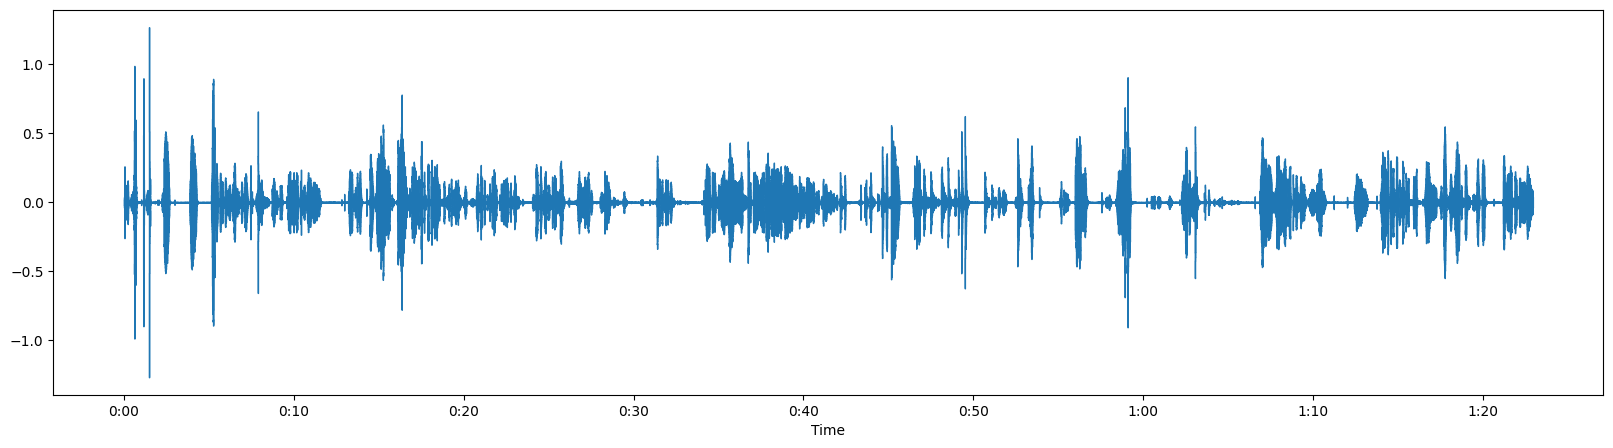

In [2]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

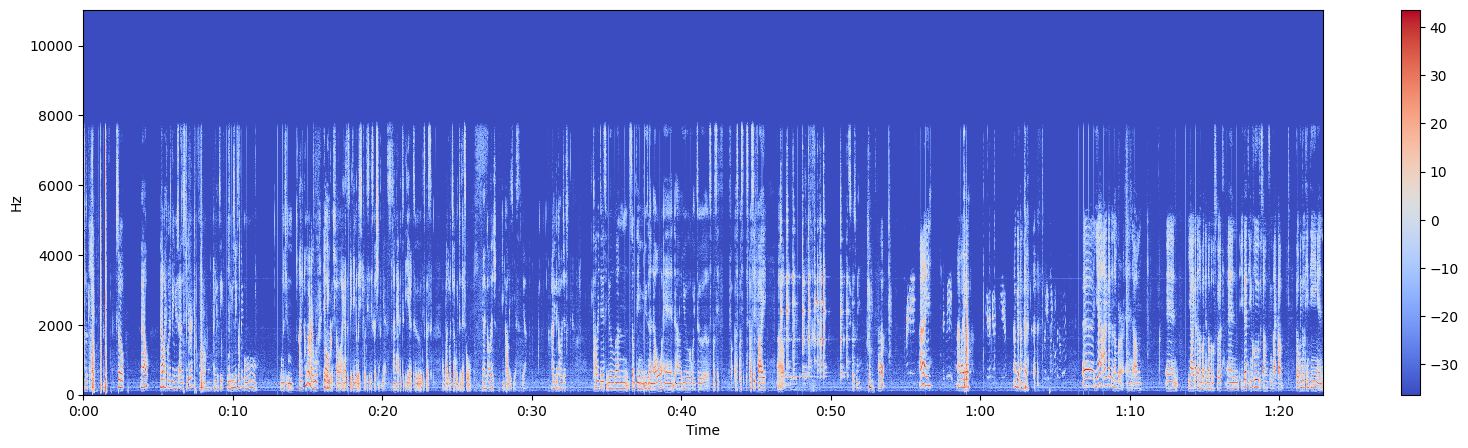

In [3]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

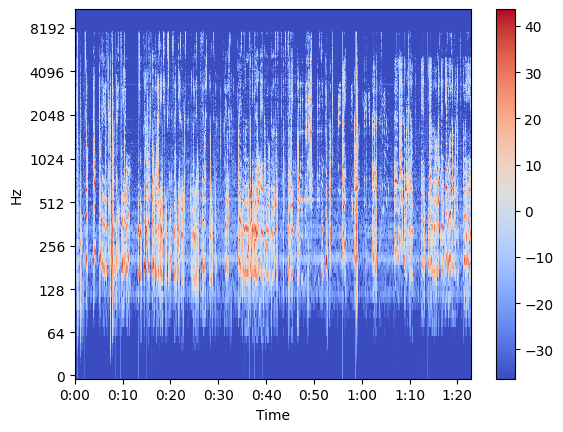

In [4]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

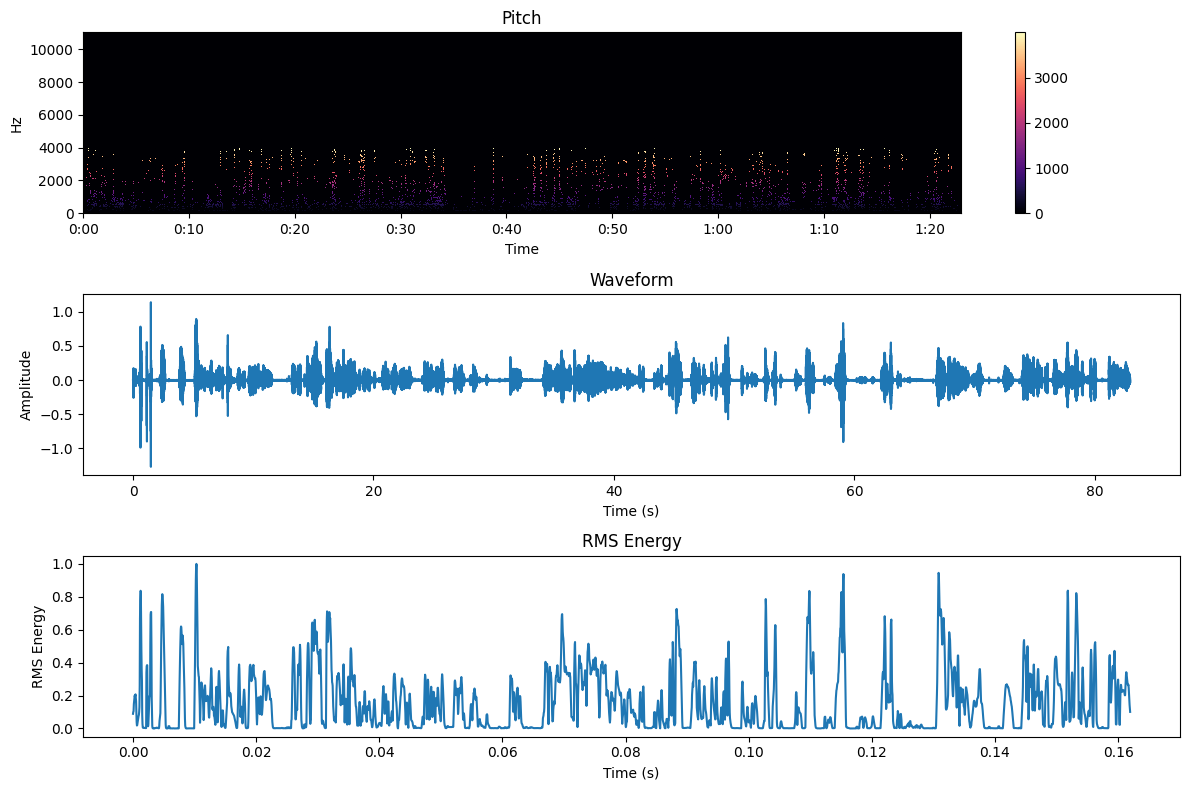

Average pitch: 710.651 Hz
Tempo (pace): 143.5546875 BPM


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def analyze_prosody(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract pitch using librosa's pitch tracking
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Calculate pitch (in Hz) from magnitudes
    pitch = np.mean(pitches[magnitudes > np.max(magnitudes) * 0.9])

    # Extract tempo (pace)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Calculate root mean square (RMS) energy
    rms = librosa.feature.rms(y=y)[0]

    # Normalize RMS to 0-1 range
    rms_norm = (rms - np.min(rms)) / (np.max(rms) - np.min(rms))

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot pitch
    plt.subplot(3, 1, 1)
    librosa.display.specshow(pitches, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar()
    plt.title('Pitch')

    # Plot tempo
    plt.subplot(3, 1, 2)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')

    # Plot RMS energy
    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(rms)) / sr, rms_norm)
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.title('RMS Energy')

    plt.tight_layout()
    plt.show()

    return pitch, tempo, rms_norm

# Example usage
audio_file = 'test.wav'
pitch, tempo, rms_norm = analyze_prosody(audio_file)
print("Average pitch:", pitch, "Hz")
print("Tempo (pace):", tempo, "BPM")


1828804


TypeError: only integer scalar arrays can be converted to a scalar index

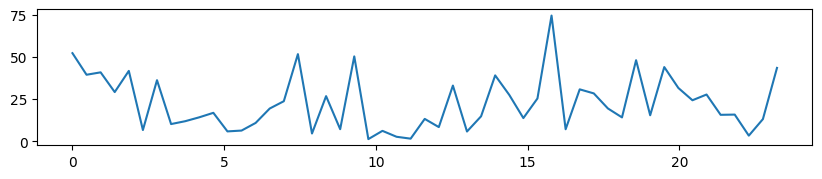

In [13]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def identify_changes(audio_file, window_size=20):
    y, sr = librosa.load(audio_file)

    # Calculate pitch, tempo, and RMS energy
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)[0]

    # Calculate time stamps for each frame
    timestamps = librosa.frames_to_time(np.arange(len(pitches)), sr=sr)

    # Initialize lists to store changes and timestamps
    pitch_changes = []
    pace_changes = []
    volume_changes = []
    time_stamps = []

    # Iterate through audio frames with the given window size
    for i in range(0, len(pitches) - window_size, window_size):
        # Calculate average pitch, pace, and volume for the window
        avg_pitch = np.mean(pitches[:, i:i + window_size])
        avg_volume = np.mean(rms[i:i + window_size])
        avg_pace = tempo

        # Append changes and timestamps
        pitch_changes.append(avg_pitch)
        pace_changes.append(avg_pace)
        volume_changes.append(avg_volume)
        time_stamps.append(timestamps[i])

    # Find indices of significant changes
    pitch_changes = np.array(pitch_changes)
    pace_changes = np.array(pace_changes)
    volume_changes = np.array(volume_changes)

    # Modify threshold values here
    pitch_threshold = 3  # adjust as needed
    pace_threshold = 0.01  # adjust as needed
    volume_threshold = 0.1  # adjust as needed

    pitch_change_indices = np.where(np.abs(np.diff(pitch_changes)) > pitch_threshold)[0]
    pace_change_indices = np.where(np.abs(np.diff(pace_changes)) > pace_threshold)[0]
    volume_change_indices = np.where(np.abs(np.diff(volume_changes)) > volume_threshold)[0]

    # Output detailed changes and time stamps
    '''
    print("Significant changes in average pitch:")
    for idx in pitch_change_indices:
        print("Time:", time_stamps[idx])
        print("Average pitch:", pitch_changes[idx])
        print()

    print("Significant changes in average pace:")
    for idx in pace_change_indices:
        print("Time:", time_stamps[idx])
        print("Average pace:", pace_changes[idx])
        print()

    print("Significant changes in average volume:")
    for idx in volume_change_indices:
        print("Time:", time_stamps[idx])
        print("Average volume:", volume_changes[idx])
        print()
    '''

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plotting pitch changes
    plt.subplot(3, 1, 1)
    plt.plot(time_stamps, pitch_changes, label='Pitch')
    plt.scatter(time_stamps[pitch_change_indices], pitch_changes[pitch_change_indices], color='r', label='Significant Change')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch')
    plt.title('Pitch Changes Over Time')
    plt.legend()

    # Plotting pace changes
    plt.subplot(3, 1, 2)
    plt.plot(time_stamps, pace_changes, label='Pace')
    plt.scatter(time_stamps[pace_change_indices], pace_changes[pace_change_indices], color='r', label='Significant Change')
    plt.xlabel('Time (s)')
    plt.ylabel('Pace')
    plt.title('Pace Changes Over Time')
    plt.legend()

    # Plotting volume changes
    plt.subplot(3, 1, 3)
    plt.plot(time_stamps, volume_changes, label='Volume')
    plt.scatter(time_stamps[volume_change_indices], volume_changes[volume_change_indices], color='r', label='Significant Change')
    plt.xlabel('Time (s)')
    plt.ylabel('Volume')
    plt.title('Volume Changes Over Time')
    plt.legend()

    # Display total statistics
    total_pitch_changes = len(pitch_change_indices)
    total_pace_changes = len(pace_change_indices)
    total_volume_changes = len(volume_change_indices)
    plt.figtext(0.5, 0.01, f'Total Pitch Changes: {total_pitch_changes}, Total Pace Changes: {total_pace_changes}, Total Volume Changes: {total_volume_changes}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Example usage
audio_file = 'test.wav'
identify_changes(audio_file)
